# Duzibble Used Cars

In [24]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import warnings
import os
import sys

from collections import defaultdict, Counter

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set()
sb.set_style('darkgrid')

plt.style.use('seaborn')
plt.tight_layout()
plt.gca()
plt.gcf()
# plt.rcParams.update({'fontsize':14})

%matplotlib inline
%reload_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("D:\Open Classroom\Datasets\Dubizzle used car sales data\data.csv")
df.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,"33,000",69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022


In [13]:
df.shape

(9970, 20)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
title                   9965 non-null object
price_in_aed            9970 non-null object
kilometers              9970 non-null int64
body_condition          9970 non-null object
mechanical_condition    9970 non-null object
seller_type             9970 non-null object
body_type               9970 non-null object
no_of_cylinders         9911 non-null object
transmission_type       9970 non-null object
regional_specs          9970 non-null object
horsepower              9970 non-null object
fuel_type               9970 non-null object
steering_side           9970 non-null object
year                    9000 non-null float64
color                   9970 non-null object
emirate                 9970 non-null object
motors_trim             9942 non-null object
company                 9970 non-null object
model                   9970 non-null object
date_posted             9970 non-null 

In [15]:
df.isnull().sum()

title                     5
price_in_aed              0
kilometers                0
body_condition            0
mechanical_condition      0
seller_type               0
body_type                 0
no_of_cylinders          59
transmission_type         0
regional_specs            0
horsepower                0
fuel_type                 0
steering_side             0
year                    970
color                     0
emirate                   0
motors_trim              28
company                   0
model                     0
date_posted               0
dtype: int64

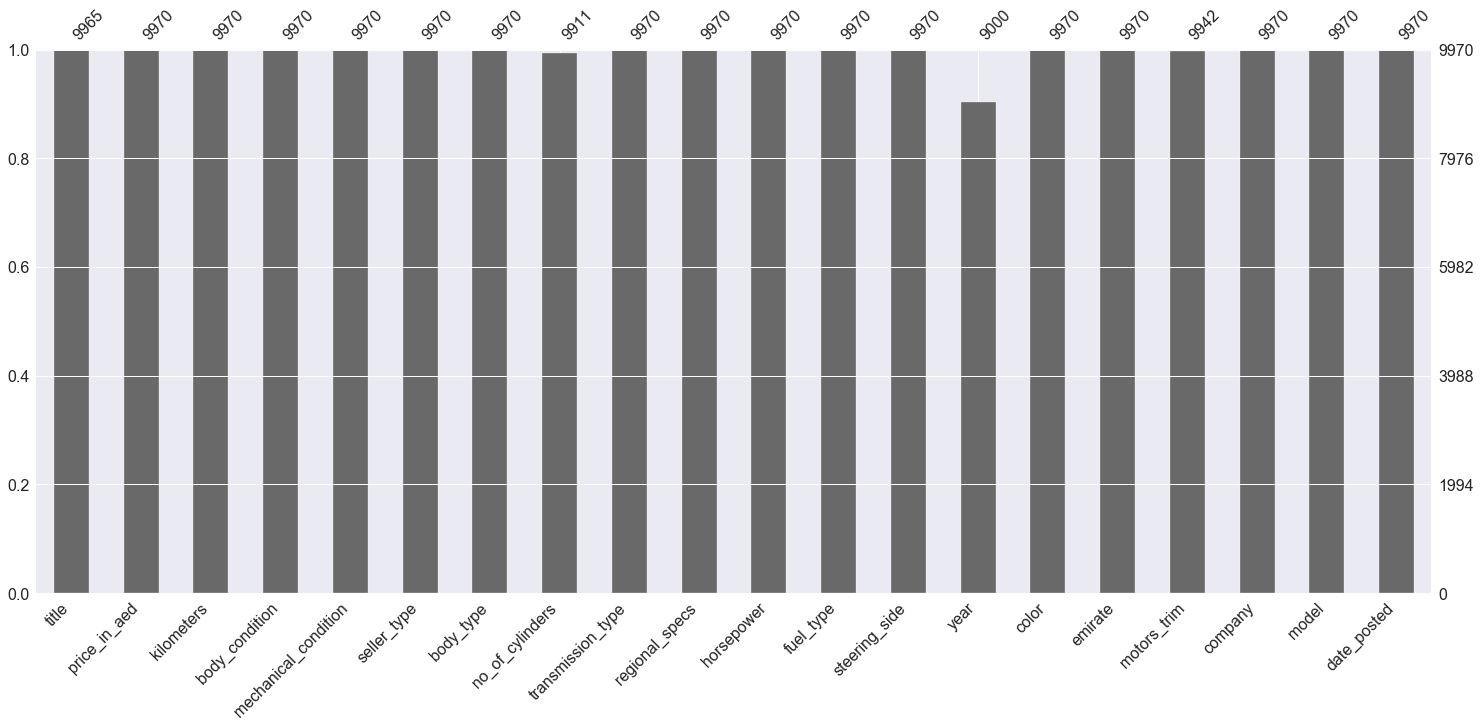

In [16]:
msno.bar(df)

In [21]:
df.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,"33,000",69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022


In [29]:
df['title'].value_counts()

nissan patrol                                                                                      76
mercedes-benz e-class                                                                              15
lexus ls-series                                                                                    14
dodge charger                                                                                      14
mercedes-benz c-class                                                                              13
                                                                                                   ..
Nissan Patrol V8 2012 Facelift 2021 ||GCC Specs || Well Maintained Personal used Original Paint     1
Gmc yukon sierraGulf painted, agency under warranty, in very excellent condition                    1
Mutsubisi L200 very clean                                                                           1
AED16,500/month | 2017 Rolls Royce Wraith 6.6L | GCC Specifications | Ref#8069    

In [18]:
df.dropna(axis = 'index', how = 'any', subset = ['title'], inplace = True)
df.shape

(9965, 20)

In [22]:
df.dropna(axis = 'index', how = 'any', inplace = True)

In [23]:
df['no_of_cylinders'].unique()

array(['6', '8', '4', '12', 'None', 'Unknown', '3', '10', '5'],
      dtype=object)

### Feature Engineering

In [26]:
x = df.drop(columns = ['price_in_aed'])
y = df['price_in_aed']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print('x_train ', x_train.shape)
print('x_test ', x_test.shape)
print('y_train ', y_train.shape)
print('y_test ', y_test.shape)

x_train  (7169, 19)
x_test  (1793, 19)
y_train  (7169,)
y_test  (1793,)


In [27]:
dtr = DecisionTreeRegressor()
lr = LinearRegression()

In [28]:
dtr.fit(x_train, y_train)
pred = dtr.predict(x_test)

ValueError: could not convert string to float: '2017 White Audi Q3 30 TFSI 2.0L/ Standard'